# Project: Investigate a Dataset (TMDb Movie Database)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset consist of list of curated set of movies for our analysis.There are two datasets - one consists of details on movies and the other on credits.We will analyze these data sets to answer questions like which keywords are the most popular, which genres are the most produced, what kinds of properties are associated with movies that have high revenues, whcih years saw the most number of movies produced, which months see the most mlovie releases over the years etc. 

In [130]:
# Importing all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
import json
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from pandas.plotting import scatter_matrix

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, we load in the data, check for cleanliness, and then trim and clean the dataset for analysis. 

### General Properties

In [131]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

In [81]:
movies.head(5)        #to see the first five rows.

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [8]:
movies.shape         # to see how many rows and columns we have. 

(4803, 20)

In [9]:
credits.head(5)      #to see the first five rows.

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [22]:
credits.shape       # to see how many rows and columns we have. 

(4803, 4)

In [86]:
movies.isnull().sum()    #lets see how many nulls we have in the dataset

budget                     0
genres                     0
homepage                3089
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               0
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  842
title                      0
vote_average               0
vote_count                 0
dtype: int64

We see that we have quite a few nulls in the homepage and tagline columns. Since these columns don't contribute towards answering our questions, we will ignore the nulls. On the other hand we see that one of the rows has a release data missing. Since we will use the release date column to answer questions we will drop this record from our analysis. 

In [132]:
movies[movies['release_date'].isnull()]  # to see which row has the missing release date value

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4553,0,[],NaN,380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],[],NaN,0,0.0,[],Released,NaN,America Is Still the Place,0.0,0


In [133]:
movies.drop(movies.index[4553], inplace=True)

In [134]:
# Since we want to perform calculations on the year we will add that as a new column

movies['year'] = pd.DatetimeIndex(movies['release_date']).year
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4802
Data columns (total 21 columns):
budget                  4802 non-null int64
genres                  4802 non-null object
homepage                1712 non-null object
id                      4802 non-null int64
keywords                4802 non-null object
original_language       4802 non-null object
original_title          4802 non-null object
overview                4799 non-null object
popularity              4802 non-null float64
production_companies    4802 non-null object
production_countries    4802 non-null object
release_date            4802 non-null object
revenue                 4802 non-null int64
runtime                 4800 non-null float64
spoken_languages        4802 non-null object
status                  4802 non-null object
tagline                 3959 non-null object
title                   4802 non-null object
vote_average            4802 non-null float64
vote_count              4802 non-null 

In [135]:
# Since we want to perform calculations on the month of release we will add that as a new column

movies['month'] = pd.DatetimeIndex(movies['release_date']).month
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year,month
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009,12


In [136]:
# We want months column to contain month names instead of numbers

movies.month.replace([1,2,3,4,5,6,7,8,9,10,11,12],
                     ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], inplace = True)

movies.head(1)       # all done !!

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year,month
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009,Dec


In [137]:
credits.isnull().sum()  #lets see how many nulls we have in the dataset

movie_id    0
title       0
cast        0
crew        0
dtype: int64

No nulls !!!

In [98]:
movies.shape

(4802, 22)

In [91]:
credits.shape

(4803, 4)


### Data Cleaning (What's going on with those weird looking columns ?)

Uh oh!! The columns genres, keywords, production_companies to name a few , have really weird looking data. We wont be able to use this data unless it is parsed into something more readable. This affects both the movies and the credits dataset. 

These columns are in the JSON format. JSON(JavaScript Object Notation),is basically a syntax for storing and exchanging data between two computers. It is mainly in a key:value format, and is embedded into a string.

All these columns have a name key, which contains the values that we need for our analyses. We will parse through the JSON and check for the name key on each row. Once the name key is found, we will store it in a list and replace the JSON with the list.The json.loads() method decodes this into a list. 

This kaggle kernel helped me in decoding the json to a string (https://www.kaggle.com/ash316/what-s-my-score/notebook)

In [138]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

# changing the keywords column from json to string
movies['keywords']=movies['keywords'].apply(json.loads)
for index,i in zip(movies.index,movies['keywords']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'keywords']=str(list1)

In [139]:
# changing the production_companies column from json to string
movies['production_companies']=movies['production_companies'].apply(json.loads)
for index,i in zip(movies.index,movies['production_companies']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'production_companies']=str(list1)

In [140]:
# changing the production_countries column from json to string    
movies['production_countries']=movies['production_countries'].apply(json.loads)
for index,i in zip(movies.index,movies['production_countries']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'production_countries']=str(list1)

In [141]:
#Changing the genres column from json to string

movies['genres']=movies['genres'].apply(json.loads)
for index,i in zip(movies.index,movies['genres']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'genres']=str(list1)

In [142]:
#Changing the spoken_languages column from json to string

movies['spoken_languages']=movies['spoken_languages'].apply(json.loads)
for index,i in zip(movies.index,movies['spoken_languages']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'spoken_languages']=str(list1)

In [143]:
# changing the cast column from json to string

credits['cast']=credits['cast'].apply(json.loads)
for index,i in zip(credits.index,credits['cast']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))
credits.loc[index,'cast']=str(list1)

In [144]:
#changing the crew column from json to string   

credits['crew']=credits['crew'].apply(json.loads)
def director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
credits['crew']=credits['crew'].apply(director)
credits.rename(columns={'crew':'director'},inplace=True)

In [145]:
movies.head(1)     # Lets see if it worked

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year,month
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",http://www.avatarmovie.com/,19995,"['culture clash', 'future', 'space war', 'spac...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"['Ingenious Film Partners', 'Twentieth Century...",...,2787965087,162.0,"['English', 'Español']",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009,Dec


In [146]:
credits.head(1)     # Lets see if it worked

,movie_id,title,cast,director
0,19995,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...",James Cameron


The columns look much more readable !!

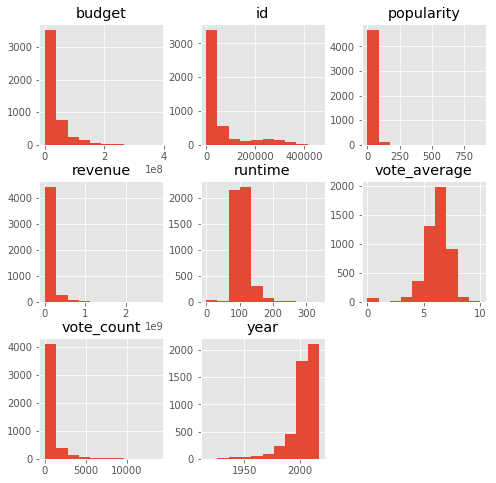

In [147]:
movies.hist(figsize = (8,8)) ;  #Plotting the numeric columns against each other to see if we spot some relation. 

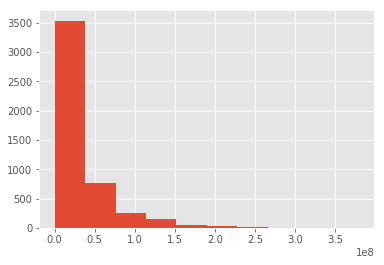

In [148]:
movies['budget'].hist();

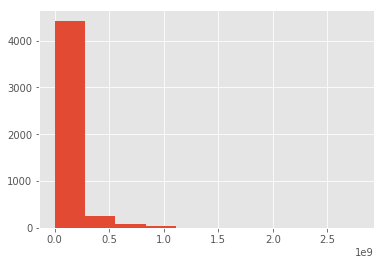

In [149]:
movies['revenue'].hist();

We notice that some rows have budget and revenue set as 0. This maybe because this data for that particular movie was not publicly available. We will let these remain for the time being.Since the currency has not been mentioned, for sake of clarity we will assume the currency is in USD. 

In [150]:
# Wordcloud for keywords
text = " ".join(review for review in movies.keywords)  
print ("There are {} words in the combination of all keywords.".format(len(text))) 

There are 517814 words in the combination of all keywords.


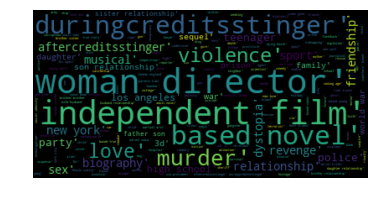

In [151]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["movie", "cinema", "id"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [152]:
# Wordcloud for genres
text = " ".join(review for review in movies.genres)
print ("There are {} words in the combination of all keywords.".format(len(text)))

There are 135825 words in the combination of all keywords.


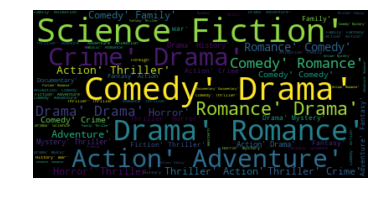

In [153]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["movie", "cinema"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (How have the movies changed by years? Do we produce more movies now? )

In [109]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4802
Data columns (total 22 columns):
budget                  4802 non-null int64
genres                  4802 non-null object
homepage                1712 non-null object
id                      4802 non-null int64
keywords                4802 non-null object
original_language       4802 non-null object
original_title          4802 non-null object
overview                4799 non-null object
popularity              4802 non-null float64
production_companies    4802 non-null object
production_countries    4802 non-null object
release_date            4802 non-null object
revenue                 4802 non-null int64
runtime                 4800 non-null float64
spoken_languages        4802 non-null object
status                  4802 non-null object
tagline                 3959 non-null object
title                   4802 non-null object
vote_average            4802 non-null float64
vote_count              4802 non-null 

In [111]:
movies['year'].min()     # When was the first movie in this list released

1916

In [35]:
movies['year'].max()    # When was the latest movie in this list released

2017

In [154]:
#For the sake of clarity we will divide the years into decades 

movies['bin'] = pd.cut(movies['year'], [1930,1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2030], 
                       labels=[ '1931-1940', '1941-1950', '1951-1960','1961-1970', '1971-1980','1981-1990', '1991-2000','2001-2010','2011-2020','2021-2030'])
movies['bin'].value_counts()    # Counting the number of movies in each bin

2001-2010    2107
2011-2020    1221
1991-2000     915
1981-1990     285
1971-1980     119
1961-1970      80
1951-1960      29
1941-1950      21
1931-1940      19
2021-2030       0
Name: bin, dtype: int64

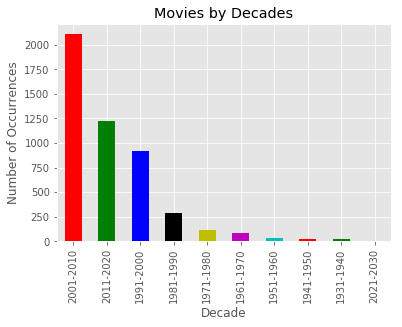

In [155]:
# Count of movies by decades

my_colors = 'rgbkymc'
pd.value_counts(movies['bin']).plot.bar(color = my_colors)
plt.title('Movies by Decades')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Decade', fontsize=12)
plt.show()

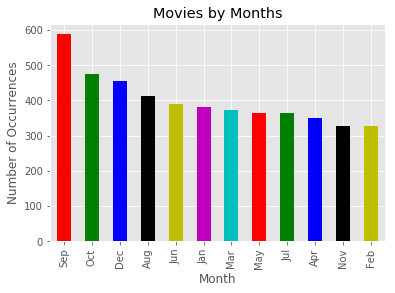

In [156]:
# Which month do they release the movies in?

my_colors = 'rgbkymc'
pd.value_counts(movies['month']).plot.bar(color = my_colors)
plt.title('Movies by Months')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.show()  # this plot shows that the most number of movies are released in September and October (Hello fall!!)

### Research Question 2  (What kinds of properties are associated with movies that have high revenues?)

In [157]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

#High budget movies correlation

corr = movies.corr()
corr                    # correlation matrix


,budget,id,popularity,revenue,runtime,vote_average,vote_count,year
budget,1.000000,-0.088963,0.505364,0.730806,0.269792,0.092644,0.593148,0.168990
id,-0.088963,1.000000,0.031760,-0.050113,-0.150497,-0.267822,-0.003710,0.434943
popularity,0.505364,0.031760,1.000000,0.644700,0.225372,0.273990,0.778114,0.101998
revenue,0.730806,-0.050113,0.644700,1.000000,0.251188,0.197153,0.781475,0.090192
runtime,0.269792,-0.150497,0.225372,0.251188,1.000000,0.371888,0.272036,-0.166849
vote_average,0.092644,-0.267822,0.273990,0.197153,0.371888,1.000000,0.313263,-0.198499
vote_count,0.593148,-0.003710,0.778114,0.781475,0.272036,0.313263,1.000000,0.114212
year,0.168990,0.434943,0.101998,0.090192,-0.166849,-0.198499,0.114212,1.000000


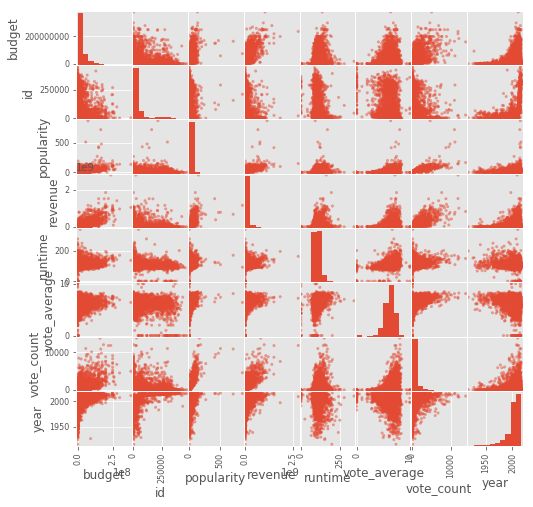

In [158]:
pd.scatter_matrix(movies, figsize=(8, 8))    
plt.show()

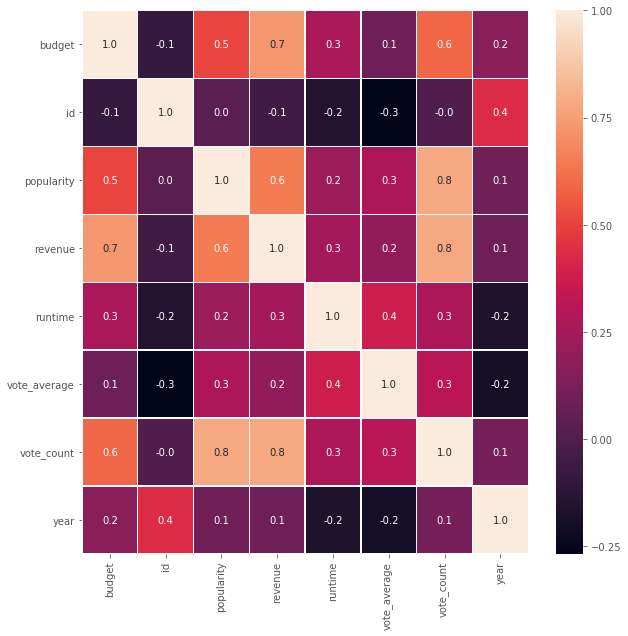

In [159]:
# Correlation Matrix Plot

f,ax = plt.subplots(figsize = (10,10))
sns.heatmap(movies.corr(), annot = True, linewidths=.5, fmt = '.1f', ax = ax)
plt.show()

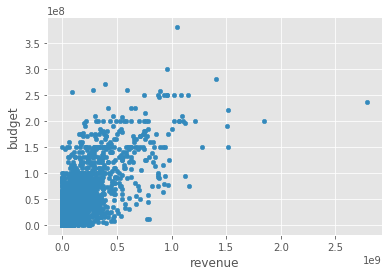

In [160]:
# Big Spenders = Big Earners ??
movies.plot(x = 'revenue', y = 'budget', kind = 'scatter'); 

There seems to be a positive correlation between big budget movies and movies that earn big revenues. It is crowded near the base because of those revenue and budget columns having 0. 

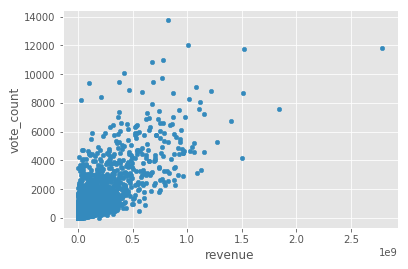

In [63]:
movies.plot(x = 'revenue', y = 'vote_count', kind = 'scatter');

There seems to be a positive correlation between movies that earn big revenues and votes. As seen from before, this might be because these movies may have higher budgets and hence more marketing. 

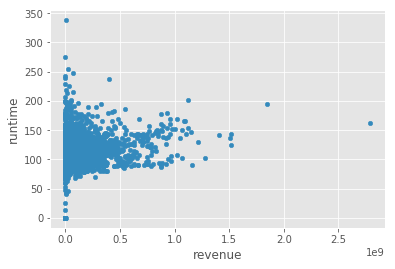

In [64]:
movies.plot(x = 'revenue', y = 'runtime', kind = 'scatter');  # There does not seem to be a correlation

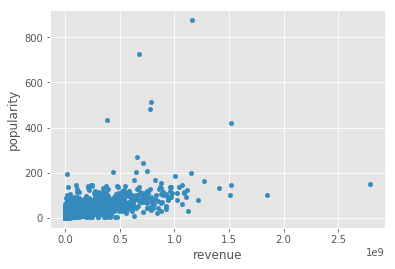

In [65]:
movies.plot(x = 'revenue', y = 'popularity', kind = 'scatter');

Revenue and popularity do not seem to be very related. 

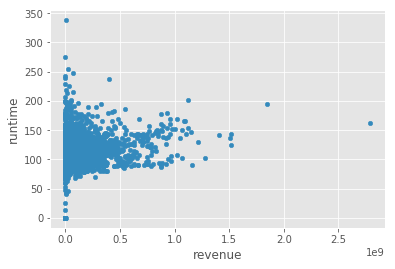

In [66]:
movies.plot(x = 'revenue', y = 'runtime', kind = 'scatter');

In [78]:
movies.iloc[movies['budget'].argmax()]   # On stranger Tides has the highest budget on the list

budget                                                          380000000
genres                                 ['Adventure', 'Action', 'Fantasy']
homepage                http://disney.go.com/pirates/index-on-stranger...
id                                                                   1865
keywords                ['sea', 'captain', 'mutiny', 'sword', 'prime m...
original_language                                                      en
original_title                Pirates of the Caribbean: On Stranger Tides
overview                Captain Jack Sparrow crosses paths with a woma...
popularity                                                        135.414
production_companies    ['Walt Disney Pictures', 'Jerry Bruckheimer Fi...
production_countries                         ['United States of America']
release_date                                                   2011-05-14
revenue                                                        1045713802
runtime                               

In [76]:
movies.iloc[movies['revenue'].argmax()]   # Avatar has the highest budget on the list

budget                                                          237000000
genres                  ['Action', 'Adventure', 'Fantasy', 'Science Fi...
homepage                                      http://www.avatarmovie.com/
id                                                                  19995
keywords                ['culture clash', 'future', 'space war', 'spac...
original_language                                                      en
original_title                                                     Avatar
overview                In the 22nd century, a paraplegic Marine is di...
popularity                                                        150.438
production_companies    ['Ingenious Film Partners', 'Twentieth Century...
production_countries       ['United States of America', 'United Kingdom']
release_date                                                   2009-12-10
revenue                                                        2787965087
runtime                               

<a id='conclusions'></a>
## Conclusions

A lot of rows are missing important information like revenue and budget as a lot of rows had a value 0. This might affect the correlation analysis.We found out that the number of movies being produced have been increasing with each decade as per advances in technology. 


The cast and language information could not be analyzed. This would have provided more information if movies by a certain director always make more revenues. 

In [128]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0